<center>
  <h1 align="center"> Retail Sales Prediction </h1>
</center>

- This dataset comprises of purchase transactions captured at a retail store. 
- The dataset has 550,069 rows and 12 columns.

Problem Statement:Build a model to predict the purchase amount of customer against various products 

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error

import warnings 
warnings.filterwarnings("ignore")

### Loading data

In [3]:
df = pd.read_csv('/Purchaseprediction/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Exploratory Data Analysis

In [20]:
def check_df(df, head=5):
    print(" SHAPE ".center(70,'#'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(70,'#'))
    print(df.dtypes)
    print(" HEAD ".center(70,'#'))
    print(df.head(head))
    print(" TAIL ".center(70,'#'))
    print(df.tail(head))
    print(" Info ".center(70,'#'))
    print(df.info())
    print(" UNIQUE VALUES ".center(70,'#'))
    print(df.apply(lambda x: len(x.unique())))
    print(" MISSING VALUES ".center(70,'#'))
    print(df.isnull().sum())
    missing_percentage = df.isnull().sum() / df.shape[0] * 100
    print(" Missing value percentage ".center(70,'*'))
    print('\n',missing_percentage)
   


In [10]:
check_df(df)

############################### SHAPE ################################
Rows: 550068
Columns: 12
############################### TYPES ################################
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object
################################ HEAD ################################
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17  

- We have 550068 purchase entries in the dataset with 12 features
- There are 5891 users in the dataset and 3631 uique products
- 31% of Product_Category_2 and 69% of Product_Category_3 has missing values.

## Data Preprocessing

In [159]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Handling missing values
- Product category 2 and 3 have missing values
- We do have some outliers lets try to impute using median

In [167]:
print('Median',df['Product_Category_2'].median())
print('Mode',df['Product_Category_2'].mode())
print('Mean',df['Product_Category_2'].mean())

Median 9.0
Mode 0    8.0
Name: Product_Category_2, dtype: float64
Mean 9.842329251122386


In [168]:
df.iloc[:,9:11]

,Product_Category_2,Product_Category_3
0,NaN,NaN
1,6.0,14.0
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
...,...,...
550063,NaN,NaN
550064,NaN,NaN
550065,NaN,NaN
550066,NaN,NaN


In [5]:
df_cleaned = df.copy()

In [6]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(df_cleaned.iloc[:, 9:11].values)
df_cleaned.iloc[:,9:11] = imputer.transform(df_cleaned.iloc[:,9:11].values)
df_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_cleaned.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
### Correlation plot after fixing missing value

<AxesSubplot:>

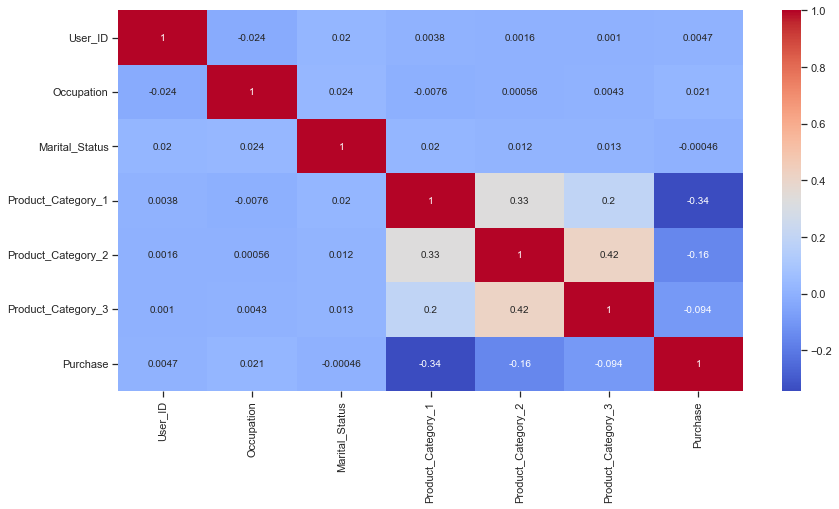

In [187]:
corr = df_cleaned.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Handling Categorical features
- Gender, Age, City_Category,Stay_In_Current_City_Years


In [188]:
df_cleaned['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
### Removing + sign from some 55+

In [8]:
df_cleaned['Age'] = df_cleaned['Age'].str.strip('+')

In [190]:
df_cleaned['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55        21504
0-17      15102
Name: Age, dtype: int64

In [193]:
df_cleaned['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
### Removing + sign from Stay_In_Current_City_Years

In [9]:
df_cleaned['Stay_In_Current_City_Years'] = df_cleaned['Stay_In_Current_City_Years'].str.strip('+')
df_cleaned['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
### Convert to type int

In [195]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
df_cleaned[['Stay_In_Current_City_Years']]=df_cleaned[['Stay_In_Current_City_Years']].astype(int)
df_cleaned[['Product_Category_2']]=df_cleaned[['Product_Category_2']].astype(int)
df_cleaned[['Product_Category_3']]=df_cleaned[['Product_Category_3']].astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int32 
 10  Product_Category_3          550068 non-null  int32 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(3), int64(5), object(4)
memory usage: 44.1+ MB


In [197]:
df_cleaned['City_Category'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
## Onehot encoding
-Gender

In [11]:
df_cleaned['Gender'] = pd.get_dummies(df_cleaned['Gender'],drop_first=True)

In [12]:
df_cleaned.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,9,14,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,9,14,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,14,1057
4,1000002,P00285442,1,55,16,C,4,0,8,9,14,7969


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  uint8 
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int32 
 10  Product_Category_3          550068 non-null  int32 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(3), int64(5), object(3), uint8(1)
memory usage: 40.4+ MB


In [14]:
# to improve the metric use one hot encoding
# label encoding
columns = ['Age', 'City_Category']
le = LabelEncoder()
for col in columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
df_cleaned.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9,14,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9,14,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,14,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9,14,7969


## Check correlation

<AxesSubplot:>

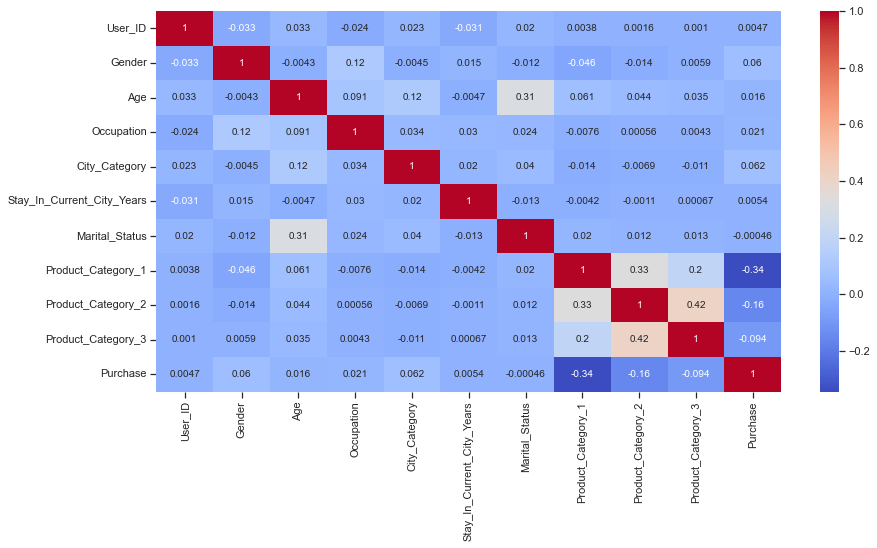

In [15]:
corr = df_cleaned.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Modelling

In [33]:
X = df_cleaned.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df_cleaned['Purchase']

In [ ]:
### Baseline model

In [ ]:
#### Create a train function

In [34]:
def train(model,X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    # predict the results
    predict = model.predict(x_test)
    # cross validation
    cv_score = cross_val_score(model, X, y, cv=5)
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.sqrt(mean_squared_error(y_test, predict))
    rmsle = np.sqrt(mean_squared_log_error(y_test, predict))
    print("Results")
    print("RMSE:", rmse)
    print("RMSLE:", rmsle)

In [ ]:
## Linear Regression

Results
RMSE: 4690.122751153956
RMSLE: 0.6951987504846358


<AxesSubplot:title={'center':'Model Coefficients'}>

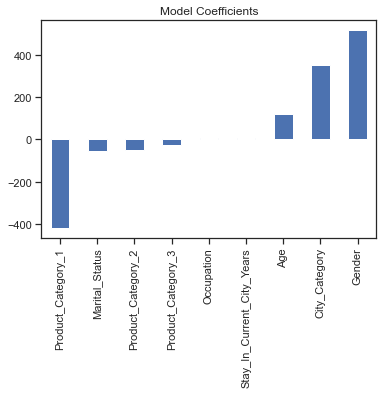

In [37]:
model1 = LinearRegression(normalize=True)
train(model1, X, y)
coef = pd.Series(model1.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [ ]:
## Decision Tree

Results
RMSE: 3346.3084828830742
RMSLE: 0.4117289636354967


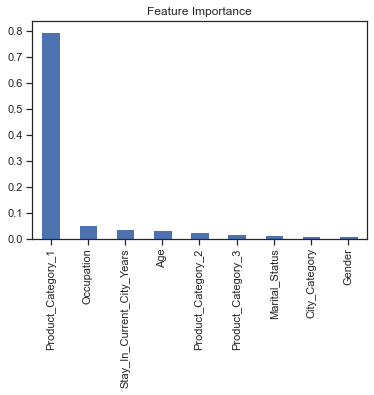

In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance');

In [ ]:
## Random Forest

Results
RMSE: 3061.388044546685
RMSLE: 0.3795131802209503


<AxesSubplot:title={'center':'Feature Importance'}>

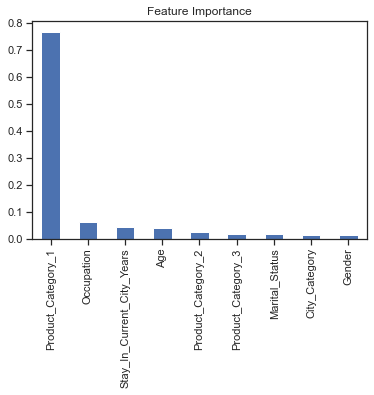

In [38]:
model2 = RandomForestRegressor(n_jobs=-1)
train(model2, X, y)
features = pd.Series(model2.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

- Random forest has the lowest Rmsle score

In [ ]:
## Hypertuning

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
print("Grid Search...")
param_grid = {"n_epochs": [5, 10], "lr_all": [0.002, 0.005]}
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, scoring='rmse", cv=5,)
grid_search.fit(data)

print(f'RMSE Best Parameters: {grid_search.best_params["rmse"]}')
print(f'RMSE Best Score:      {grid_search.best_score["rmse"]}\n')

In [ ]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

rf_grid = {'n_estimators': [10,20,30],
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = GridSearchCV(RandomForest(), rf_grid, scoring = 'neg_root_mean_squared_error',n_jobs=-1, cv = 5)
# fit the model
model.fit(X_train, y_train)

In [45]:
rf_grid = {'n_estimators': [10,20,30],
           'max_features': ["auto", "sqrt", "log2"],
           'max_depth': [5,10,20,30],
           "min_samples_split" : [2,4,8],}
model = RandomForestRegressor(random_state=42)           
grid_search = GridSearchCV(model, rf_grid, scoring = 'neg_root_mean_squared_error',n_jobs=-1, cv = 5)
# fit the model
grid_search.fit(x_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [46]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=8,
                      n_estimators=30, random_state=42)

In [47]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

Results
RMSE: 2939.8876265096073
RMSLE: 0.42421352162936066


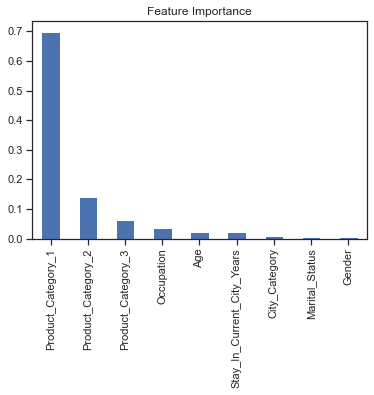

In [49]:
model3 = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=8,n_estimators=30, random_state=42,n_jobs=-1)
model3.fit(x_train, y_train)
predict = model3.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predict))
rmsle = np.sqrt(mean_squared_log_error(y_test, predict))
print("Results")
print("RMSE:", rmse)
print("RMSLE:", rmsle)
features = pd.Series(model3.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance');

- Product category_1 seem to have highest effect on purchase
- Surprisingly gender has the least effect on purchase